In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


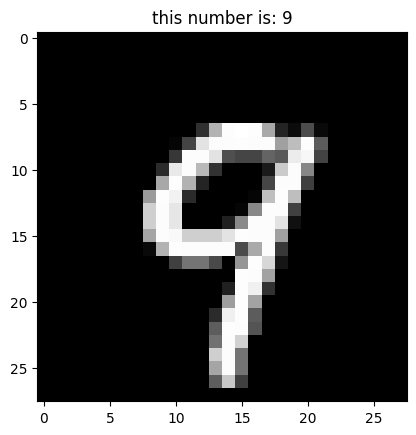

In [4]:
plt.title(f"this number is: {y_test[12]}")
plt.imshow(X_test[12], cmap='gray')

In [5]:
# Normalize data chuyển hóa dữ liệu ảnh
X_train_scaled = np.array([x.ravel()/255. for x in X_train])
X_test_scaled = np.array([x.ravel()/255. for x in X_test]) 
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(60000, 784)
(10000, 784)


In [6]:
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Input

#buil model

inp = Input(shape = (784, ))
out = Dense(units = 10, activation = 'softmax')(inp)

model = Model(inputs = inp, outputs = out)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [7]:
# y_test_one_hot = np.zeros((X_test.shape[0], 10))
# for i in range(X_test.shape[0]):
#   y_test_one_hot[i, Y_test[i]] = 1

In [8]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train_scaled, y_train, epochs = 10, batch_size = 32, validation_data = (X_test_scaled, y_test))


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4646 - accuracy: 0.8766 - val_loss: 0.3122 - val_accuracy: 0.9126
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3034 - accuracy: 0.9149 - val_loss: 0.2849 - val_accuracy: 0.9211
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2835 - accuracy: 0.9212 - val_loss: 0.2739 - val_accuracy: 0.9237
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2731 - accuracy: 0.9243 - val_loss: 0.2678 - val_accuracy: 0.9258
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2666 - accuracy: 0.9258 - val_loss: 0.2706 - val_accuracy: 0.9245
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2615 - accuracy: 0.9267 - val_loss: 0.2648 - val_accuracy: 0.9274
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2586 - accuracy: 0.9287 - val_loss: 0.2640 - val_accuracy:

In [9]:
y_train_one_hot = np.zeros((X_test.shape[0],10))
for i in range(X_test.shape[0]):
  y_train_one_hot[i, y_test[i]] = 1

In [10]:
print(y_test[:10])
print(y_train_one_hot[:10])

[7 2 1 0 4 1 4 9 5 9]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [11]:
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

inp = Input(shape = (784, ))
out = Dense(units = 10, activation = 'softmax')(inp)

model = Model(inputs = inp, outputs = out)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [12]:
from pandas.core.arrays import categorical
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy' ,metrics = ['accuracy'])
history = model.fit(X_train_scaled, a,
                    batch_size = 64,
                    epochs = 10, validation_split = 0.2)


ModuleNotFoundError: No module named 'pandas'